In [66]:
from eulers_method import *
import matplotlib.pyplot as plt
import numpy as np

# Euler Solution Example

Consider the problem of the cooling of an object, Newtons rule of cooling tells us that an object starting at the temperature $T_0$ such that $T(0) = T_0$. 

$$\frac{dT}{dt} = \alpha (T-T_s)$$

Where $T_s$ is the temperature of the objects surroundings, T(t) is the temperature of that object at time t and $\alpha <0$ is a constant of proportionality, since the rate of cooling is proportionate to the difference of the object temperature and the surrounding temperature.

We next integrate both sides w.r.t time.

$$
\begin{align*}
\int^{t}_{0}\frac{1}{\alpha (T-T_s)} \frac{dT}{dt} dt =\int^{t}_{0}dt \\
\int^{t}_{0}\frac{1}{(T-T_s)} dT = \alpha t \\
\ln{|T-T_s|-\ln{|T_0-T_s|}} = \alpha t \\
\ln{\frac{|T-T_s|}{|T_0-T_s|}} = \alpha t \\
\frac{|T-T_s|}{|T_0-T_s|} = e^{\alpha t} \\
|T-T_s| = |T_0-T_s|e^{\alpha t}
\end{align*}
$$

Case 1: if we assume that $T_0 > T_s$ and that $T(t) \geq T_s$ then $T = T_s + (T_0 - T_s) e^{\alpha t}$

Case 2: if we assume that $T_0 < T_s$ and that $T(t) \leq T_s$ then $T = (T_s - T_0) e^{\alpha t} + T_s$

Case 3: In this case we have that $T_0 = T_s$ then the object is at room temperature thus $T = T_s$ is constant

In [67]:
initial_temperature = 30
alpha = -1 
surrounding_temperature = 35
endpoint = 5
steps = 1000

# Analytical Solution



In [68]:
def case1(time,surrounding_temperature = surrounding_temperature,alpha = alpha ,T_0 = initial_temperature):
    return surrounding_temperature + (T_0 - surrounding_temperature) * np.exp(alpha * time)

In [69]:
def case2(time,surrounding_temperature = surrounding_temperature,alpha = alpha,T_0 = initial_temperature):
    return (surrounding_temperature - T_0) * np.exp(alpha * time) + surrounding_temperature

In [70]:
def case3(x,surrounding_temperature = surrounding_temperature):
    return surrounding_temperature

In [71]:
space = np.arange(0,endpoint,endpoint/steps)

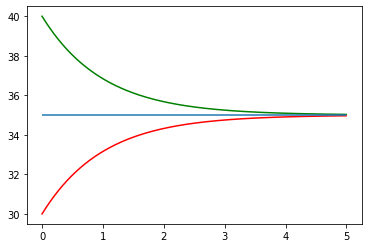

In [72]:
plt.plot(space,case1(space),color = 'red')
plt.plot(space,case2(space),color = 'green')
plt.hlines(y = surrounding_temperature,xmin = 0,xmax = endpoint)

# Numerical Solution

In [73]:
def law_of_cooling(T:float,alpha:float,surrounding_temperature:float) -> float:
    if alpha > 0:
        raise TypeError("Alpha must be negative.")
    return alpha * (T - surrounding_temperature)

In [74]:
x,y = euler_method(
    lambda x,y: law_of_cooling(x,alpha,surrounding_temperature),
    [0,initial_temperature],
    endpoint,
    steps
)

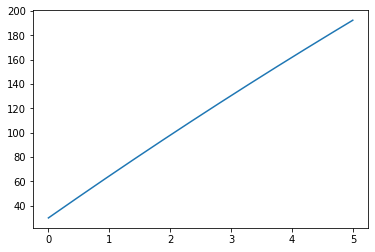

In [75]:
plt.plot(x,y)

In [88]:
x,y = euler_method(
    lambda x,y: (1-y),
    [0,0],
    5,
    100
)

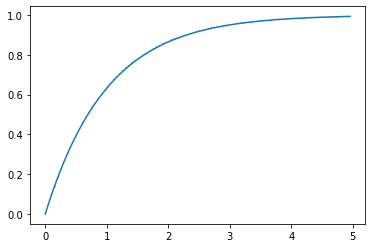

In [89]:
plt.scatter(x,y,s = .1)
plt.plot(x,1-np.exp(-x))

$$
\begin{align*}
\frac{dy}{dx} = 1-y \ , \ y(0) = 0\\
-\int^{x}_{0} \frac{1}{y-1} dy = x \\
\ln{\frac{1}{1-y}} = x \\
\frac{1}{1-y} = e^x \\
1 - e^{-x} = y
\end{align*}
$$